## **5. Unsupervised Learning – Clustering**


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_reduced = pd.read_csv("../data/heart_reduced.csv")

X_reduced = df_reduced.drop(columns='num')
y = df_reduced['num'].astype(int)

**5.1 K-means with elbow and silhouette**

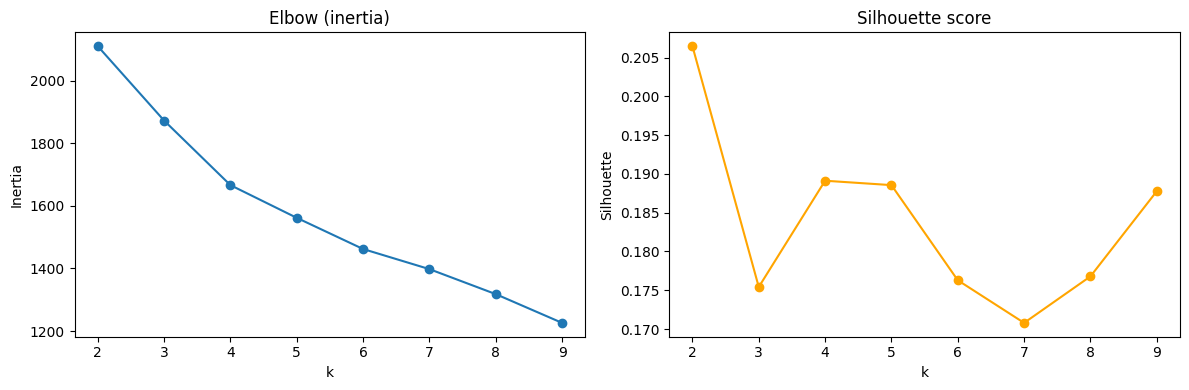

Selected k by silhouette: 2


In [2]:
# Use the reduced features if you created them; otherwise use X
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Standardize for clustering (safe even if already standardized before)
Xc = StandardScaler().fit_transform(X_reduced)

ks = range(2, 10)
inertias, sils = [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(Xc)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(Xc, labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(ks, inertias, marker="o"); ax[0].set_title("Elbow (inertia)"); ax[0].set_xlabel("k"); ax[0].set_ylabel("Inertia")
ax[1].plot(ks, sils, marker="o", color="orange"); ax[1].set_title("Silhouette score"); ax[1].set_xlabel("k"); ax[1].set_ylabel("Silhouette")
plt.tight_layout(); plt.show()

# Pick k (you can choose the elbow or the best silhouette)
best_k = ks[int(np.argmax(sils))]
print("Selected k by silhouette:", best_k)

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
k_labels = kmeans.fit_predict(Xc)

# Quick visualization (if you have PCA PCs already as pca_df)
if 'pca_df' in globals():
    plt.figure(figsize=(7,5))
    sns.scatterplot(x="PC1", y="PC2", hue=k_labels, palette="tab10", data=pca_df, legend="full", alpha=0.7)
    plt.title(f"K-Means clusters (k={best_k}) over PC1/PC2")
    plt.show()


**5.2 Hierarchical clustering with dendrogram**

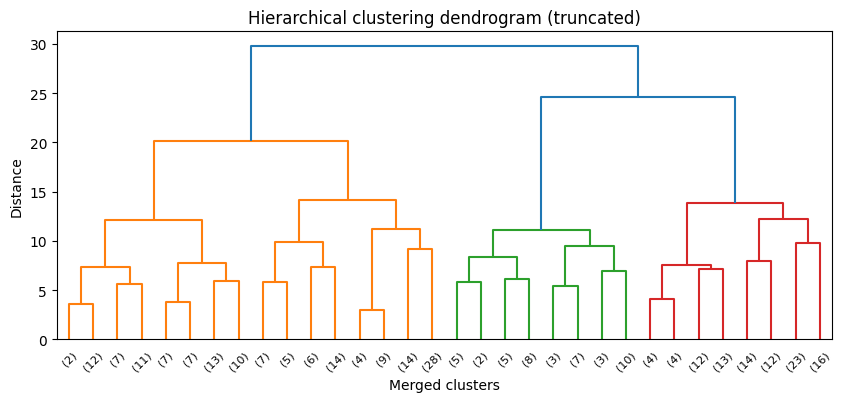

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Ward linkage on standardized features
Z = linkage(Xc, method="ward")

plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode="level", p=4)
plt.title("Hierarchical clustering dendrogram (truncated)")
plt.xlabel("Merged clusters")
plt.ylabel("Distance")
plt.show()

# Choose number of clusters for a flat cut (align with kmeans for comparison)
h_labels = fcluster(Z, t=best_k, criterion="maxclust") - 1

**5.3 Compare clusters to true labels**

In [4]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score

# K-Means comparison
print("K-Means vs target")
print(pd.crosstab(k_labels, y, rownames=["cluster"], colnames=["num"]))
print("ARI:", adjusted_rand_score(y, k_labels))
print("NMI:", normalized_mutual_info_score(y, k_labels))
print("Homogeneity:", homogeneity_score(y, k_labels))

# Hierarchical comparison
print("\nHierarchical vs target")
print(pd.crosstab(h_labels, y, rownames=["cluster"], colnames=["num"]))
print("ARI:", adjusted_rand_score(y, h_labels))
print("NMI:", normalized_mutual_info_score(y, h_labels))
print("Homogeneity:", homogeneity_score(y, h_labels))


K-Means vs target
num        0   1   2
cluster             
0        167   1   1
1         82  34  12
ARI: 0.16366292370015018
NMI: 0.2051087097321291
Homogeneity: 0.23316735458963894

Hierarchical vs target
num        0   1   2
cluster             
0        154   1   1
1         95  34  12
ARI: 0.10110320063443415
NMI: 0.1747485957681235
Homogeneity: 0.2000023937996425
